In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = pd.read_csv("flight_delays.csv")
np.shape(data)

(100000, 9)

In [7]:
data.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


### Доля всех задержек ко всем вылетам

In [12]:
np.shape((data[data['dep_delayed_15min'] == 'N']))
print('Доля всех задержек ко всем вылетам:', np.shape((data[data["dep_delayed_15min"] == "Y"]))[0] / np.shape(data)[0])

Доля всех задержек ко всем вылетам: 0.19044


### Зависимость количества задержек от длины пути, который предстоит пролететь самолету

In [85]:
data_delayed = data[data['dep_delayed_15min'] == 'Y']
data_delayed.index = [i for i in range(data_delayed.shape[0])]
data_delayed

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
1,c-10,c-14,c-5,1704,OO,SLC,SEA,689,Y
2,c-6,c-21,c-3,1519,EV,ATL,ILM,377,Y
3,c-12,c-3,c-7,1653,EV,ATL,MYR,317,Y
4,c-3,c-24,c-4,2303,US,CLT,CHS,168,Y
...,...,...,...,...,...,...,...,...,...
19039,c-7,c-31,c-1,2027,DL,ATL,SJC,2116,Y
19040,c-5,c-20,c-5,2117,MQ,LGA,BGR,378,Y
19041,c-4,c-28,c-4,2222,XE,EWR,DAB,884,Y
19042,c-4,c-11,c-1,1730,WN,JAN,BWI,888,Y


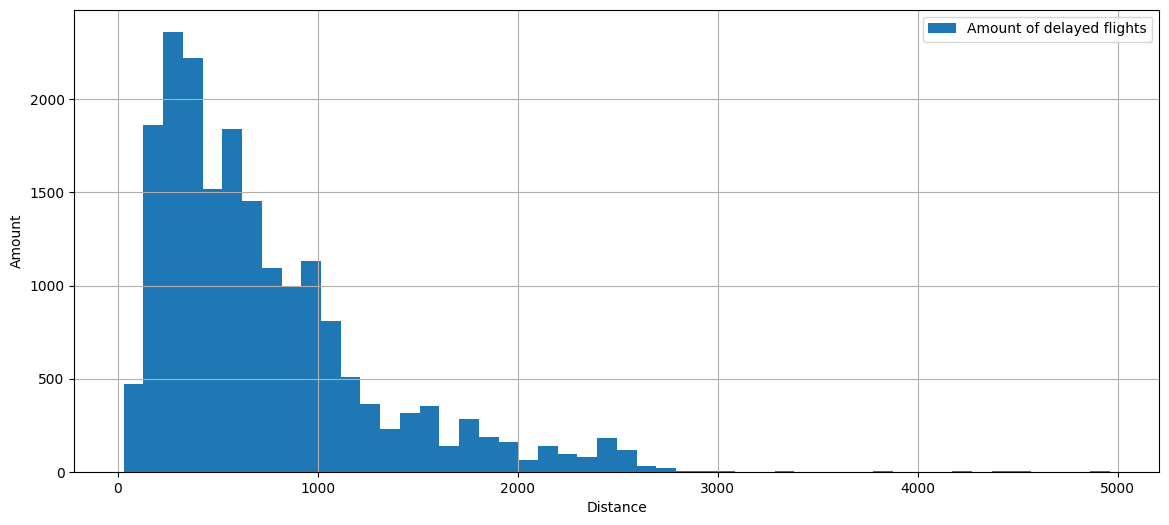

In [86]:
data_delayed['Distance'].hist(figsize=(14, 6), bins=50, label = 'Amount of delayed flights')
plt.xlabel('Distance')
plt.ylabel('Amount')
plt.legend();

### Топ 5 направлений, для которых чаще всего происходят задержки

In [87]:
data_delayed.groupby('Dest').dep_delayed_15min.count().sort_values(ascending=False).head(5)

Dest
ATL    1281
ORD    1072
DFW     656
EWR     584
LAX     525
Name: dep_delayed_15min, dtype: int64

### В какие времена года чаще всего происходят задержки рейсов

In [88]:
set(data_delayed["Month"])

{'c-1',
 'c-10',
 'c-11',
 'c-12',
 'c-2',
 'c-3',
 'c-4',
 'c-5',
 'c-6',
 'c-7',
 'c-8',
 'c-9'}

In [89]:
months = {'c-1'  : 'Winter',
           'c-10' : 'Autumn',
           'c-11' : 'Autumn',
           'c-12' : 'Winter',
           'c-2'  : 'Winter',
           'c-3'  : 'Spring',
           'c-4'  : 'Spring',
           'c-5'  : 'Spring',
           'c-6'  : 'Summer',
           'c-7'  : 'Summer',
           'c-8'  : 'Summer',
           'c-9'  : 'Autumn'}

In [90]:
pd.Series([months[month] for month in data_delayed["Month"]])

0        Autumn
1        Autumn
2        Summer
3        Winter
4        Spring
          ...  
19039    Summer
19040    Spring
19041    Spring
19042    Spring
19043    Autumn
Length: 19044, dtype: object

In [91]:
data_delayed["Month"]

0        c-10
1        c-10
2         c-6
3        c-12
4         c-3
         ... 
19039     c-7
19040     c-5
19041     c-4
19042     c-4
19043     c-9
Name: Month, Length: 19044, dtype: object

In [92]:
data_delayed = data_delayed.assign(Season=pd.Series([months[month] for month in data_delayed["Month"]]))
data_delayed.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,Season
0,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y,Autumn
1,c-10,c-14,c-5,1704,OO,SLC,SEA,689,Y,Autumn
2,c-6,c-21,c-3,1519,EV,ATL,ILM,377,Y,Summer
3,c-12,c-3,c-7,1653,EV,ATL,MYR,317,Y,Winter
4,c-3,c-24,c-4,2303,US,CLT,CHS,168,Y,Spring


In [94]:
data_delayed.groupby('Season').dep_delayed_15min.count()

Season
Autumn    4177
Spring    4295
Summer    5723
Winter    4849
Name: dep_delayed_15min, dtype: int64

Летом больше всего задержек

### Топ 10 самых хороших перевозчиков, которые реже всего задерживают свои рейсы

In [97]:
data_delayed.groupby('UniqueCarrier').dep_delayed_15min.count().sort_values().head(10)

UniqueCarrier
AQ     18
HA     33
TZ     64
DH    156
F9    156
HP    196
B6    393
YV    478
AS    541
FL    736
Name: dep_delayed_15min, dtype: int64

### Топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки

In [100]:
data_delayed.groupby('Origin').dep_delayed_15min.count().sort_values(ascending=False).head(10)

Origin
ATL    1506
ORD    1254
DFW     902
DEN     575
LAX     552
LAS     546
EWR     538
IAH     492
PHX     491
DTW     401
Name: dep_delayed_15min, dtype: int64

### Необычная зависимость количества задержек от имеющихся данных

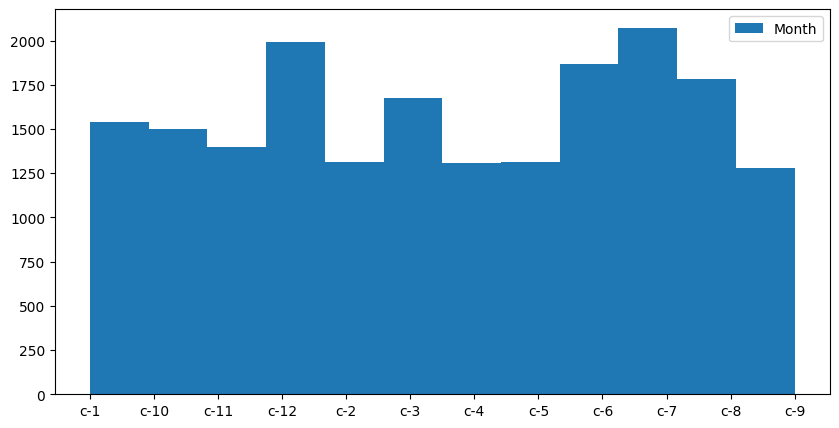

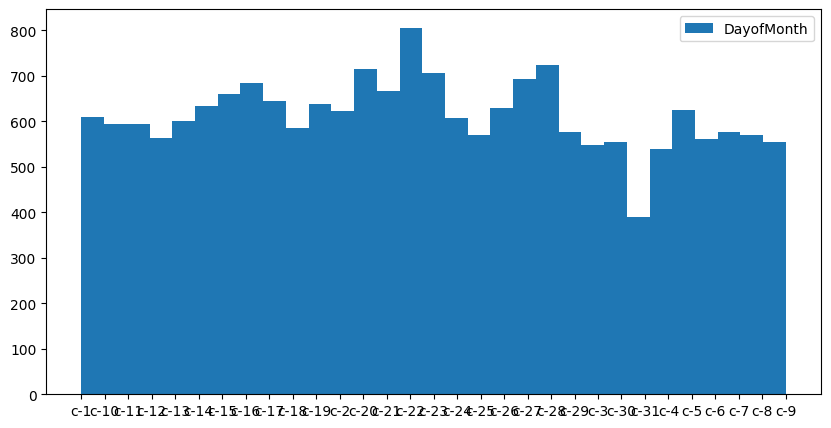

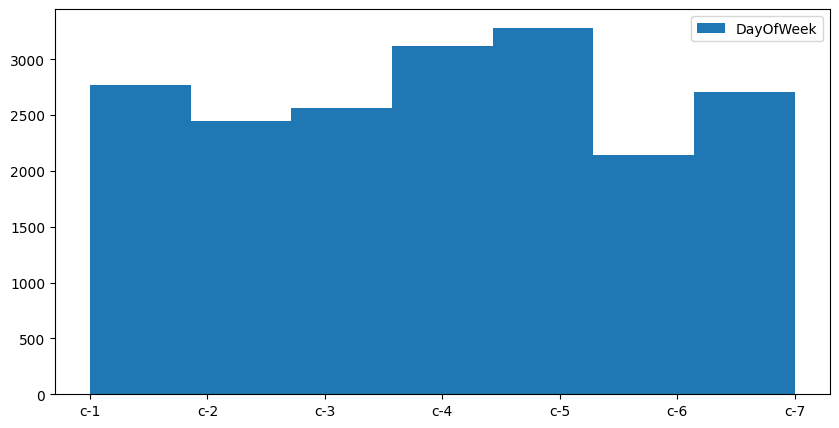

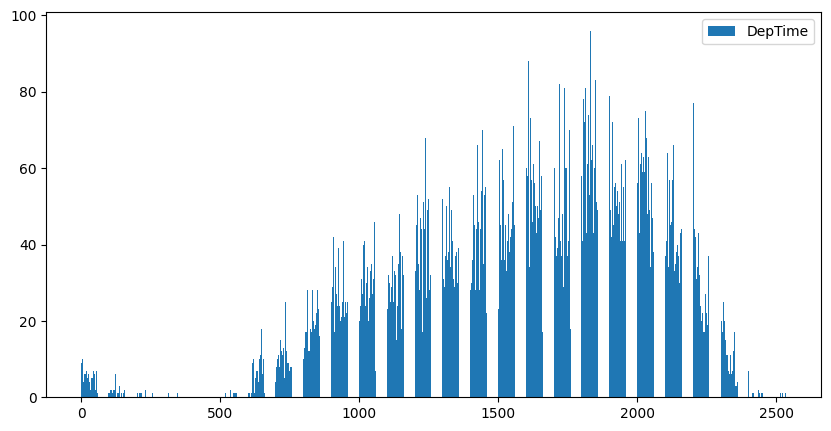

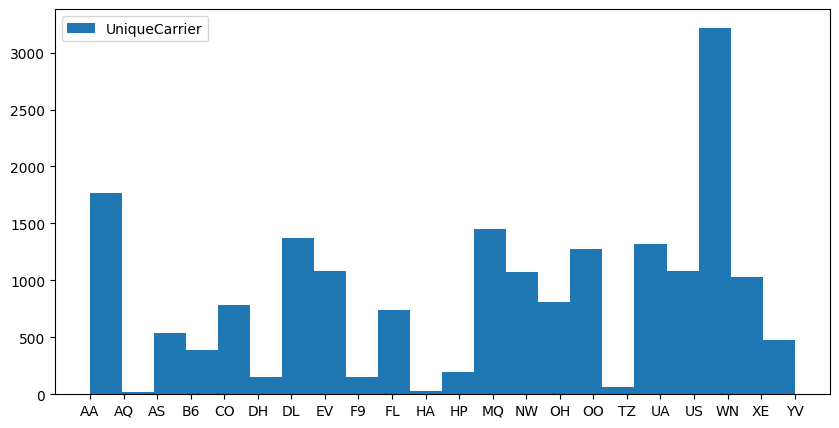

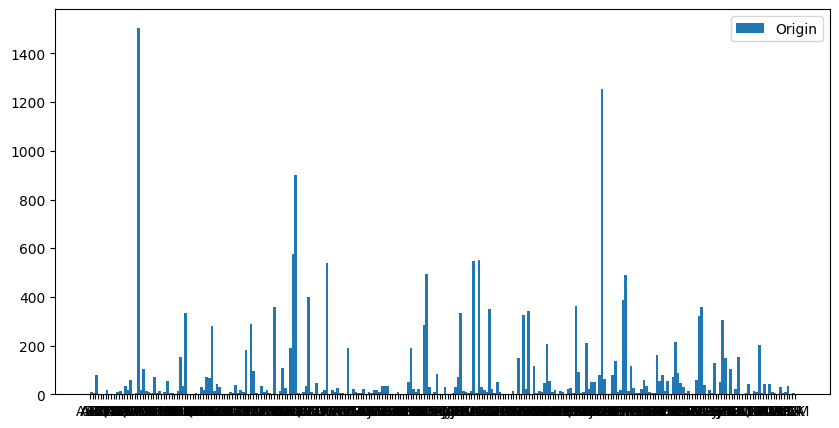

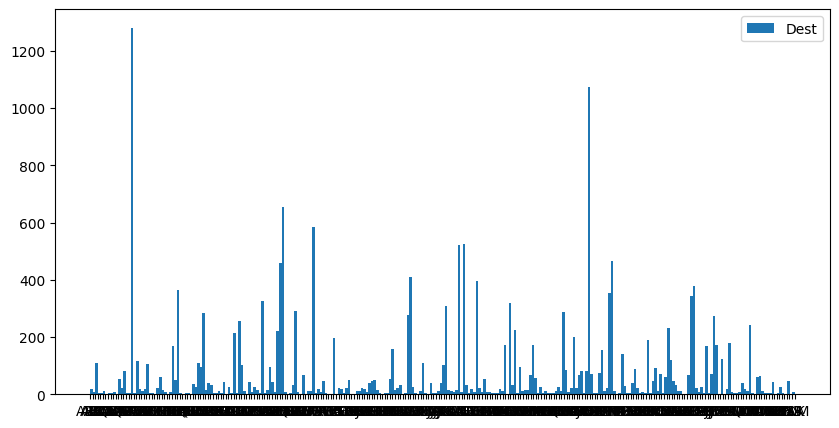

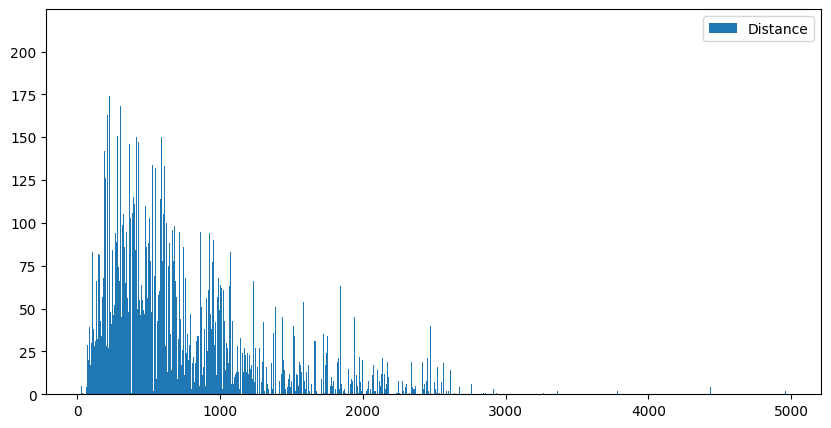

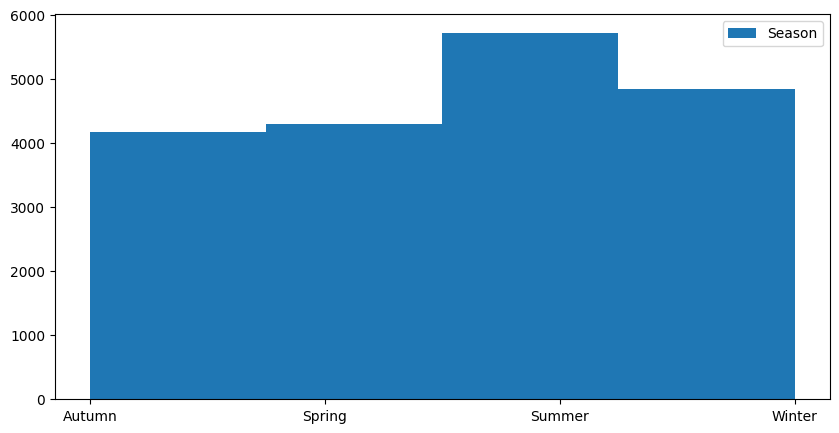

In [109]:
for column in data_delayed:
    if column == "dep_delayed_15min":
        continue
    plt.figure(figsize=(10, 5))
    plt.hist(data_delayed[f"{column}"].sort_values(), label=f"{column}", bins=len(set(data_delayed[f"{column}"])))
    plt.legend();

Из необычного
- Резкий рост количества задержек летом с последующим спадом к осени
- Рост количества задержек к концу рабочей недели